In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, TimeDistributed, Bidirectional
from keras.layers import LSTM, SpatialDropout1D, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Flatten
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import keras
import codecs
import os

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)

In [15]:
data = pd.read_csv('posts.csv', names=['Author', 'Text'], sep=',', header=None)
data.head()

,Author,Text
0,22211,"Надо жить у моря, Мама.\n\nAdMe.ru публикует р..."
1,22211,Памятка трейдера.\n\nВыражения и термины приме...
2,22211,"Руслан Проводников или ""Сибирский Рокки"", как ..."
3,61454,"""Выбирай платья на лето"", ""готовься к лету вме..."
4,61454,"""Спят ли мамы?""- я не знала. На такой вопрос о..."


In [16]:
#from nltk.corpus import stopwords
#stop = stopwords.words('russian')
#data['Text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
#print('Stop words have been deleted')
#data['Text'].apply(lambda x: x.replace('\n', ' '));

### Подсчет количества слов в корпусе

In [17]:
data['CountWords'] = data['Text'].map(lambda x: len(x.split()))
print('Количество статей в корпусе:', len(data))

Количество статей в корпусе: 98442


In [18]:
spam_list = [301557842, 184330667, 191315693, 111604181, 212846761, 278053852, 281162155, 206300456, 306859957, 19006413, 275267400, 131629784, 276695686, 227968805, 65265920, 215657793, 212066696, 281866527, 172515637, 420657548, 259904924, 103086082, 36309849, 151622711, 304407589, 304407589, 234135027, 330779808, 135431520, 326927985, 22070189, 16497456, 22070189, 16497456, 120772826, 181255568, 24655736, 90966607, 102977537, 317336618, 189704404, 11663845, 57439210, 163452787, 38680483, 121144040, 211289578, 280155968, 198528079, 277512341, 33152119, 314327791, 229101154, 271546215, 4121239, 59729051, 288393060, 17620663, 296431137, 320666372, 153340241, 13309210, 333014765, 24595847, 152263680, 135815313, 27763994, 34902711, 200488318, 393710429, 400853612, 18091069, 232368999, 243123251, 159034443, 101820061, 334397479, 36372315, 18412482, 362494239, 98538332, 94983825, 171941220, 35386477, 179364423, 136668179, 57446172, 288223392, 321431512, 277994902, 190694040, 325021098, 129392296, 289027630, 216216545, 75884932, 208023062, 185965346, 2857932, 2574325, 154034429, 312715518, 286913827, 336049060, 163410643, 309938895, 372204020, 400615680, 235441786, 8391421, 136997064, 174934251, 173179778, 134275738, 93070783, 403039516, 326194938, 26960550, 18090797, 15931375, 64401851, 14665799, 223678239, 1963998, 252135842, 16352364, 386230491, 135103805, 335233013, 226605259, 94018354, 363143703, 278775919, 134780377,498638, 498638, 20403116, 824871, 22259914, 203601767, 386435681, 280519165, 225577927, 336493264, 203836012, 250362235, 135154139, 332671406, 296879545, 191398452, 48411613, 276175277, 77459397, 15155303, 6646818, 174692652, 25755928, 145799445, 210213078, 225680585, 167783297, 159347782, 154637631, 343704548, 276329737, 158954181, 7736592, 52430830, 54738353, 181641220, 249065698, 356566757, 12276180, 146475131, 38034256, 301152537, 181250759, 65169740, 229445819, 360098848, 204181735, 311981137, 9365217, 323032519, 144081373, 166471693, 219977388, 3252582, 92645976, 341675206, 394122042, 8469671, 293599275, 150564713, 315874927, 75299334, 395839270, 256327432, 8758868, 234523373, 234523373] 
print(len(spam_list))
lam = lambda row: row['Author'] not in spam_list
data = data[data.apply(lam, axis=1)]

201


In [19]:
author_count_news = data.Author.value_counts()
print('Количество авторов в корпусе:', len(author_count_news))
#print(author_count_news[:-8300: -1])
#author_count_news.plot(kind='bar', figsize=(15, 5), title="Number of author's articles");

Количество авторов в корпусе: 8410


### Количество статей у каждого пользователя

In [20]:
num_classes = 50
skip_person = 0
author_count_news = author_count_news[skip_person:skip_person + num_classes]

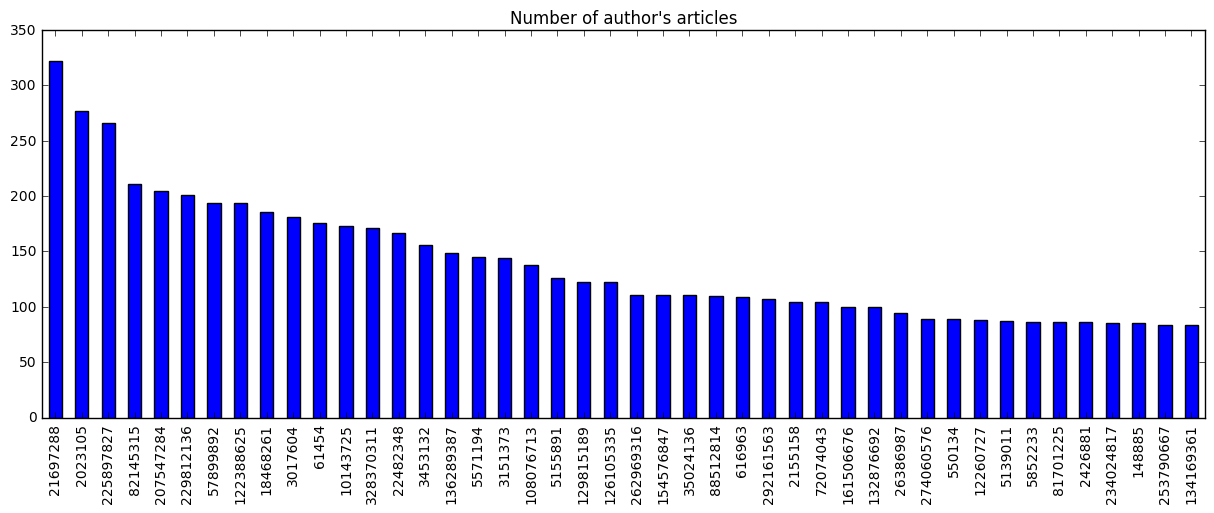

In [10]:
author_count_news.plot(kind='bar', figsize=(15, 5), title="Number of author's articles");

In [31]:
for i, number in author_count_news.items():
    print(str(i) + ',')
    print(data[data.Author == i]['Text'][:10])
    print('===========')

41,
5      Камеры снимите со штативов, поверните к стене,...
18     Я, Кося🐱 и щуки...  Второй вечер развлекаемся,...
23     Если долго гулять по Подмосковью, то можно наб...
63     В общем: квесты-это тема!!!  Наше новое семейн...
146    Так и хочется написать какой-нибудь пафосный п...
171    Сегодня, водитель автобуса, увидев, что я бегу...
219    #Repost @mediapolygon_24 \n・・・\n"Деловая репут...
292    Я и мамонт.... мамонт и я)) #селфи #мастерселф...
325    [club49517766|Город 312] отыграли просто шикар...
350    Альтернативная доска почёта в холдинге #медиа9...
Name: Text, dtype: object
8,
10     Страшно то, что мне все эти фамилии знакомы =_...
24     "Мне постоянно снится один и тот же сон", – пр...
35     Во мне вечно борются порядок и хаос. Без пафос...
74     Мне всю жизни казалось, что начинать обучение ...
96     Пересматриваю старьё в оригинале.\nWaterworld ...
197    "Глава Чеченской республики ... заявил о налич...
222    Эбола — это, без сомнения, очень плохо, но в п..

### Подготовка данных

In [21]:
temp_data = pd.DataFrame()
names_author = author_count_news.index.values

for author in names_author:
    temp_data = temp_data.append(data[data.Author == author])

data = temp_data
print('Количество статей после удаления:', len(data))

Количество статей после удаления: 10636


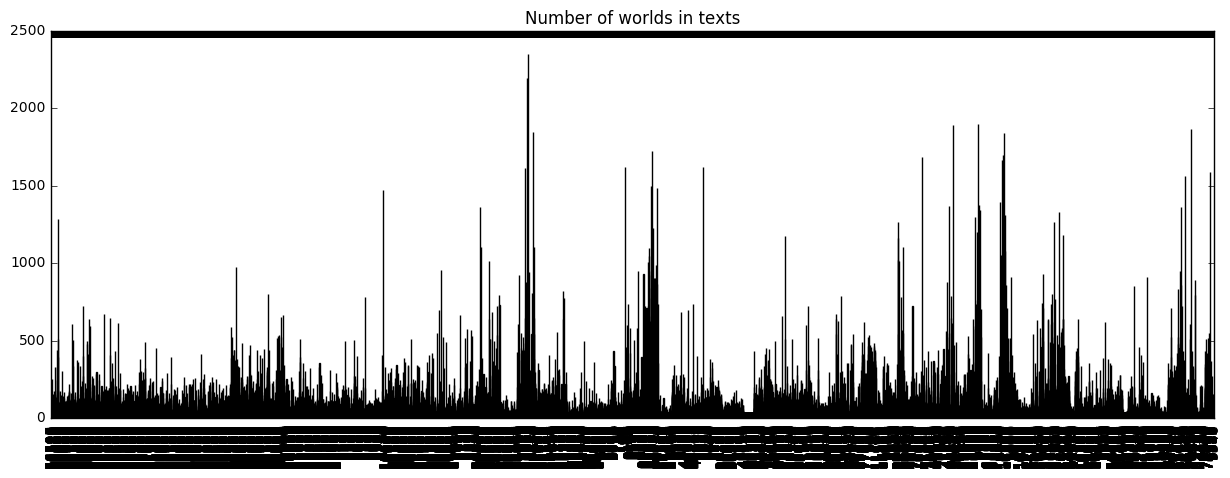

In [67]:
data.CountWords.plot(kind='bar', figsize=(15, 5), title="Number of worlds in texts");

In [22]:
def remove_stopwords(data):
    from nltk.corpus import stopwords
    stop = stopwords.words('russian')
    data['Text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
    print('Stop words have been deleted')

In [23]:
def get_lemmatization_corpus(data):
    import pymorphy2
    morph = pymorphy2.MorphAnalyzer()
    data['TextLem'] = data['Text'].map(lambda x: ' '.join([morph.parse(word)[0].normal_form for word in x.split()]))
    print('The lemmatization completed')

In [24]:
names = data.Author.value_counts().index.values

lableEnc = LabelEncoder()
lableEnc.fit(names.ravel()) 
lables = lableEnc.transform(names).reshape((num_classes, 1))

oneHotEnc = OneHotEncoder()
oneHotEnc.fit(lables)

for author in names:
    val = lableEnc.transform([author])[0]
    data.Author.replace(to_replace=author, value=val, inplace=True)

data.head()

,Author,Text,CountWords
56504,40,---Жизнь-— Колыбель. Пеленки. Плач. Слово. Шаг...,103
56505,40,"- ... мать! - Дорогой, ты что-то сказал? - Я с...",49
56506,40,"- Алло, это полиция?\n- Да, говорите.\n- Челов...",77
56507,40,"- Господи, как скучно мы живем! В нас пропал д...",41
56508,40,"- Если женское сердце ты смог растопить, \nНен...",74


In [25]:
# Перемешать набор данных и удалить index столбец
data = data.sample(frac=1).reset_index(drop=True)

### Токенизация текста

In [26]:
def get_texts_to_matrix(texts, max_features = 0):
    tokenizer = Tokenizer(split=" ", lower=True)
    if max_features != 0:
        tokenizer = Tokenizer(split=" ", lower=True, num_words=max_features)
    
    tokenizer.fit_on_texts(texts)
    matrix_tfidf = tokenizer.texts_to_matrix(texts=texts, mode='tfidf')
    print('Количество текстов:', matrix_tfidf.shape[0])
    print('Количество токенов:', matrix_tfidf.shape[1])
    return matrix_tfidf

In [27]:
def get_texts_to_sequences(text):
    # создаем единый словарь (слово -> число) для преобразования
    tokenizer = Tokenizer(split=" ", lower=True)
    tokenizer.fit_on_texts(text)
    # Преобразуем все описания в числовые последовательности, заменяя слова на числа по словарю.
    text_sequences = tokenizer.texts_to_sequences(text)
    print('В словаре {} слов'.format(len(tokenizer.word_index)))
    return text_sequences

In [28]:
def get_texts_to_gramm_sequences(texts, count_gramm = 3):
    gramms = {}
    counter_gramm = 0
    result = []
    temp_vector = []
    
    for text in texts:
        for i in range(len(text) - count_gramm - 1):
            gramm = text[i : i + count_gramm]
            if gramms.get(gramm) == None:
                gramms[gramm] = counter_gramm
                counter_gramm += 1
            temp_vector.append(gramms[gramm])
        result.append(temp_vector)
        temp_vector = []
        
    print('Количество грамм в корпусе:', len(gramms))
    #count_gramm = [len(x) for x in text_threegramm]
    #num = np.array(count_gramm)
    #num.mean()
    return result

In [44]:
#X = get_texts_to_matrix(data['Text'], 80000)
X = get_texts_to_gramm_sequences(data['Text'])
#X = get_texts_to_sequences(data['Text'])

Количество грамм в корпусе: 112526


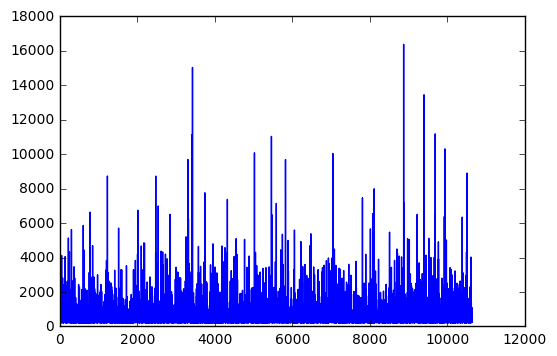

In [45]:
#plt.plot(X)
means = [len(x) for x in X]
plt.plot(means)
#X.plot(kind='bar', figsize=(15, 5), title="Number of worlds in texts");

### Разбиваем выборку на тестовую и тренировочную

In [46]:
def get_X_y_for_traning(X, y, num_words):
    #tokenizer = Tokenizer(num_words=num_words)
    #X = tokenizer.sequences_to_matrix(X, mode='binary')
    
    X = keras.preprocessing.sequence.pad_sequences(X, maxlen=num_words)     
    y = keras.utils.to_categorical(y, num_classes)
    print('Размерность X:', X.shape) 
    print('Размерность y:', y.shape)
    return X, y

In [47]:
# Максимальное количество слов в самом длинном тексте
num_words = 5000
X_full, y_full = get_X_y_for_traning(X, data.Author, num_words)
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

print('Testing set size:', len(X_test))
print('Training set size:', len(X_train))

Размерность X: (10636, 5000)
Размерность y: (10636, 50)
Testing set size: 2128
Training set size: 8508


### Создание модели нейронной сети

In [48]:
def get_lstm_model(input_length):
    model = Sequential()
    model.add(Embedding(input_length, 200))
    model.add(SpatialDropout1D(0.3))
    model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
    model.add(Dense(num_classes, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def get_bidirectional_lstm():
    model = Sequential()
    model.add(Embedding(80000, 200))
    model.add(SpatialDropout1D(0.2))
    model.add(Bidirectional(LSTM(50, dropout=0.3, recurrent_dropout=0.3)))
    model.add(Dense(num_classes, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def get_conv_model():
    model = Sequential()
    model.add(Embedding(160000, 300))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(num_classes, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def get_conv_conv_model():
    model = Sequential()
    model.add(Embedding(160000, 300))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D())
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(num_classes, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def get_conv_lstm_model():
    model = Sequential()
    #model.add(Dense(102562, activation='relu', input_shape=(8664, 600)))
    model.add(Embedding(100000, 200))
    model.add(SpatialDropout1D(0.3))
    #model.add(TimeDistributed(Conv1D(filters=512, kernel_size=3, activation='relu')))
    #model.add(TimeDistributed(GlobalMaxPooling1D()))
    #model.add(TimeDistributed(Flatten()))
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D())
    #model.add(Flatten())
    model.add(LSTM(50, dropout=0.3, recurrent_dropout=0.3))
    model.add(Dense(num_classes, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def get_lstm_conv_model():
    model = Sequential()
    model.add(Embedding(160000, 300))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(50, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)) 
    #model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(num_classes, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [50]:
#model = get_lstm_model() # 34.10 10-epoch
#model = get_bidirectional_lstm() # 50.86 20-epoch
model = get_conv_model() # 53.1 6-epoch
#model = get_conv_conv_model() # 54.04 7-epoch
#model = get_conv_lstm_model() # 53.17 10-epoch
#model = get_lstm_conv_model() # 52.60 10-epoch

model.summary()

BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 2

history = model.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, verbose=VERBOSE, 
                    validation_split=0.1, 
                    #callbacks=[EarlyStopping(monitor='val_loss')]
                   )

%time

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 300)         48000000  
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, None, 300)         0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 512)         461312    
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                25650     
Total params: 48,486,962
Trainable params: 48,486,962
Non-trainable params: 0
_________________________________________________________________
Train on 7657 samples, validate on 851 samples
Epoch 1/10
116s - loss: 3.2496 - acc: 0.1471 - val_loss: 2.6912 - val_acc: 0.0975
E

In [51]:
print('Точность модели составляет: {}'.format(model.evaluate(X_test, y_test, batch_size=64, verbose=2)[1] * 100))

Точность модели составляет: 69.50187969924812


dict_keys(['val_loss', 'val_acc', 'acc', 'loss'])


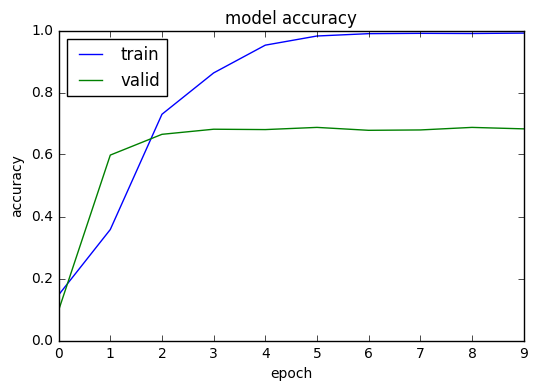

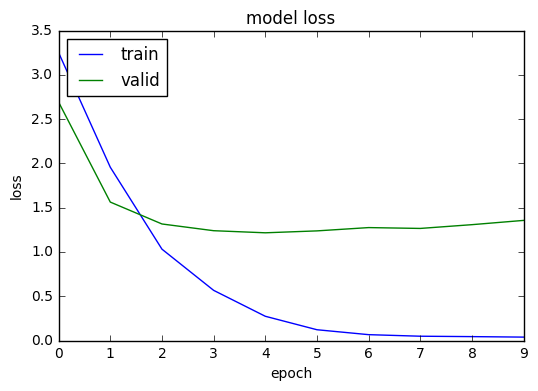

In [52]:
from matplotlib import pyplot as plt
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show();
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show();

In [44]:
def save_model(model, model_name):
    # Генерируем описание модели в формате json
    model_json = model.to_json()
    # Записываем модель в файл
    json_file = open("model/{}_model.json".format(model_name), "w")
    json_file.write(model_json)
    json_file.close()
    model.save_weights("model/{}_weights.h5".format(model_name))
    print('Модель и веса успешно сохранены!')

In [58]:
save_model(model, 'vk_98percent_cnn')

Модель и веса успешно сохранены!
